Importing data


In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

In [ ]:
import pickle 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MLProject_KenyaFinancial

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MLProject_KenyaFinancial


In [ ]:
x_path = "/content/drive/MyDrive/MLProject_KenyaFinancial/clean_data/ohc3df" 
y_path = "/content/drive/MyDrive/MLProject_KenyaFinancial/clean_data/depVar"

with open(x_path, 'rb') as ifile:
  Xd =pickle.load(ifile)
with open(y_path, 'rb') as ifile:
  Yd =pickle.load(ifile)

Yd = Yd.fillna("")


In [ ]:
Xd1.shape

(735849, 433)

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(Xd)


In [ ]:
le = preprocessing.LabelEncoder()
Yd = le.fit_transform(Yd)

yNames = []
for i in range(Yd.max()):
  yNames.append(i)
yNames = le.inverse_transform(yNames)
#print(yNames)

In [ ]:
xNames = Xd.columns

In [ ]:
drop4 = []
for col in xNames:
  if "trx_class_code" in col:
    drop4.append(col)
    print('y')

In [ ]:
print(drop4)

['trx_class_code_assets', 'trx_class_code_cash', 'trx_class_code_findev', 'trx_class_code_income', 'trx_class_code_opex', 'trx_class_code_nan']


In [ ]:
Xd1 = Xd.drop(drop4, axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
XtrainVal, Xtest, YtrainVal, Ytest = train_test_split(X, Yd, test_size=0.2, random_state=42)
Xtrain, Xval, Ytrain, Yval = train_test_split(XtrainVal, YtrainVal, test_size=0.25, random_state=42)

Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)

In [ ]:
clf = clf.fit(Xtrain, Ytrain)

In [ ]:
YpredVal = clf.predict(Xval)
YpredTrain = clf.predict(Xtrain)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Yval, YpredVal))
print("F1:",metrics.f1_score(Yval, YpredVal, average="weighted"))
print("Matthew's Correlation Coefficient:",metrics.matthews_corrcoef(Yval, YpredVal))


Accuracy: 0.9808181015152545
F1: 0.9807135379795124
Matthew's Correlation Coefficient: 0.9264981227887281


In [ ]:

print("Accuracy:",metrics.accuracy_score(Ytrain, YpredTrain))
print("f1:",metrics.f1_score(Ytrain, YpredTrain, average="weighted"))
print("Matthew's Correlation Coefficient:",metrics.accuracy_score(Ytrain, YpredTrain))

Accuracy: 0.9979026475111492
f1: 0.9978890865587732
Matthew's Correlation Coefficient: 0.9979026475111492


Scores tabulation


In [ ]:
Scores = {}
Scores[10] = {"Accuracy" : 0.9447101990894884, "F1" : 0.9367140384201371, "MCC" : 0.7708153875348147}

In [ ]:
Scores[5] = {"Accuracy": 0.9175307467554529, "F1": 0.8956887060013157, "MCC": 0.6365482515306515}

In [ ]:
Scores[25] = {"Accuracy": 0.9700006794863083, "F1": 0.9686111076513461, "MCC": 0.8814133149102973}

In [ ]:
Scores[50] = {"Accuracy": 0.9808181015152545, "F1": 0.9807135379795124, "MCC": 0.9264981227887281}

In [ ]:
Scores

{5: {'Accuracy': 0.9175307467554529,
  'F1': 0.8956887060013157,
  'MCC': 0.6365482515306515},
 10: {'Accuracy': 0.9447101990894884,
  'F1': 0.9367140384201371,
  'MCC': 0.7708153875348147},
 25: {'Accuracy': 0.9700006794863083,
  'F1': 0.9686111076513461,
  'MCC': 0.8814133149102973},
 50: {'Accuracy': 0.9808181015152545,
  'F1': 0.9807135379795124,
  'MCC': 0.9264981227887281}}

In [ ]:
ScoresDF = pd.DataFrame([[5, 0.9175307467554529, 0.8956887060013157, 0.6365482515306515],[10, 0.9447101990894884, 0.9367140384201371, 0.7708153875348147],[25, 0.9700006794863083, 0.9686111076513461, 0.8814133149102973], [50, 0.9808181015152545, 0.9807135379795124, 0.9264981227887281]], columns = ["depth", "accuracy", "F1", "MCC"])

In [ ]:
ScoresDF.to_csv("treeScores.csv", sep=";")

In [ ]:
ScoresDF

,depth,accuracy,F1,MCC
0,5,0.917531,0.895689,0.636548
1,10,0.944710,0.936714,0.770815
2,25,0.970001,0.968611,0.881413
3,50,0.980818,0.980714,0.926498


In [ ]:
tenTree = clf

In [ ]:
fiveTree = clf

In [ ]:
import matplotlib.pyplot as plt

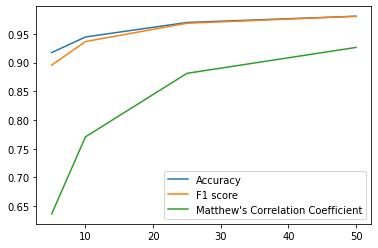

In [ ]:
plt.plot(ScoresDF.depth, ScoresDF.accuracy, label = "Accuracy")
plt.plot(ScoresDF.depth, ScoresDF.F1, label = "F1 score")
plt.plot(ScoresDF.depth, ScoresDF.MCC, label = "Matthew's Correlation Coefficient")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


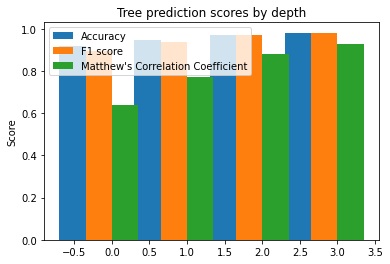

In [ ]:

x = np.arange(len(ScoresDF.depth))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*3/2,ScoresDF.accuracy , width, label = "Accuracy")
rects2 = ax.bar(x - width/2, ScoresDF.F1, width, label = "F1 score")
rects3 = ax.bar(x + width/2, ScoresDF.MCC, width, label = "Matthew's Correlation Coefficient")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Tree prediction scores by depth')
ax.set_xticks(x, ScoresDF.depth.tolist())
ax.legend()

#ax.bar_label(rects1, padding=6)
#ax.bar_label(rects2, padding=6)
#ax.bar_label(rects3, padding=6)

#fig.tight_layout()

plt.show()

In [ ]:
ScoresDF.depth

0     5
1    10
2    25
3    50
Name: depth, dtype: int64

In [ ]:
ScoresDF = ScoresDF.set_index('depth')

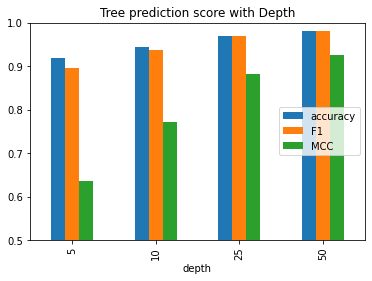

In [ ]:
ScoresDF.plot.bar(ylim = (0.5, 1), title = 'Tree prediction score with Depth').legend(loc='center right')

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names= xNames,  
                   class_names = yNames)
                   #filled=True)


In [ ]:
plt.figure(figsize=(120,30))
tree.plot_tree(clf, max_depth = 5, class_names = yNames, feature_names = xNames, fontsize=16, label = 'none', rounded = True)
plt.show()